# Study the scaling M of a single qtrit gate by a SLM phase only with dimension N

#### Study of single qdit inference gate
By Claudio
Initial version 31 Agoust 2019, single input training with clipping of real and imaginary part

Figure 3 of [arXiv:1905.05264](https://arxiv.org/abs/1905.05264)

Version 4 april 2020

Need tensorflow 1.15 
`pip install tensorflow==1.15`


In [1]:
import sys
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
from utilitiesquantumgates import quantumgates 
from utilitiesquantumgates import quantumgatesinference 
from utilitiesquantumgates import SLM
from utilitiesquantumgates import utilities
from tensorboardutilities import tensorboardutilities
from datetime import datetime
#%% datatypes
npdatatype=np.complex64
tfdatatype=tf.complex64
tfrealdatatype=tf.float32 # to use double switch aboe to complex128

In [3]:
N=3 # reduced dimensions
M=5 # embedding dimension

In [4]:
X_np=quantumgates.Xgate(N,npdatatype)

In [5]:
# print("Single qdit gate X")
utilities.printonscreennp(X_np)    
        

+0.0+0.0i +1.0+0.0i +0.0+0.0i 
+0.0+0.0i +0.0+0.0i +1.0+0.0i 
+1.0+0.0i +0.0+0.0i +0.0+0.0i 


In [6]:
# Generate the random unitary matrix
U_np=quantumgates.randomU(M,npdatatype)  
utilities.printonscreennp(U_np)    


-0.3-0.1i +0.3+0.4i -0.5-0.1i +0.3+0.3i +0.3+0.3i 
-0.4-0.3i -0.2-0.2i -0.4-0.4i -0.1-0.6i -0.1-0.2i 
-0.2-0.5i +0.2-0.2i -0.0+0.0i -0.4+0.5i +0.2-0.5i 
-0.3-0.4i -0.5+0.0i +0.3+0.4i +0.1-0.1i +0.4+0.3i 
-0.3-0.3i +0.5+0.2i +0.3+0.2i -0.1-0.3i -0.5+0.2i 


# Test training for N=3 and M=5

In [7]:
out, Sin, Tfinal, Tinitial=SLM.trainSLMsingleinputquantized(X_np,U_np,verbose=3, epochs=10000,display_steps=500,
                                                                     realMIN=-3.15, realMAX=3.15, 
                                                                    imagMIN=0.0, imagMAX=0.0)                                                                 

Random seed = 1586014642
Tensor("Const:0", shape=(5, 5), dtype=complex64)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Running with M 5 N 3 ntrain 1 nvalid 1
epoch 0
cost 4.927868366241455
valid cost 4.927868366241455
epoch 500
cost 0.027538854628801346
valid cost 0.027538854628801346
epoch 1000
cost 0.005576704163104296
valid cost 0.005576704163104296
epoch 1500
cost 6.009903154335916e-05
valid cost 6.009903154335916e-05
Convergence in validation reached at epoch 1500
Final Wreal
+0.1+0.0i +2.0+0.0i +2.7+0.0i -1.0+0.0i +3.2+0.0i 
-0.7+0.0i +3.1+0.0i +3.2+0.0i +1.7+0.0i -0.7+0.0i 
-1.2+0.0i +2.3+0.0i -1.2+0.0i +2.2+0.0i +2.1+0.0i 
-0.1+0.0i +2.2+0.0i +2.2+0.0i -1.2+0.0i -1.6+0.0i 
+0.2+0.0i -0.0+0.0i -0.9+0.0i +2.3+0.0i +2.3+0.0i 
Final Wimag
+0.0+0.0i +0.0+0.0i +0.0+0.0i +0.0+0.0i +0.0+0.0i 
+0.0+0.0i +0.0+0.0i +0.0+0.0i +0.0+0.0i +0.0+0.0i 
+0.0+0.0i +0.0+0.0i +0.0+0.0i +0.0+0.0i +0.0+0.0i 
+0.0+0.0i +0.0+0.0i +0.0+0.0i +0.0+0.0i +0.0+

In [8]:
print(out)

{'accuracy': 0.0001, 'epoch': 1500, 'ntrain': 1, 'nvalid': 1, 'N': 3, 'M': 5, 'X': array([[0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j]], dtype=complex64)}


In [9]:
# test the solution
#utilities.printonscreennp(Tinitial)

In [10]:
utilities.printonscreennp(Sin)

+1.0+0.1i -0.4+0.9i -0.9+0.5i +0.6-0.8i -1.0-0.0i 
+0.8-0.6i -1.0+0.0i -1.0-0.0i -0.2+1.0i +0.8-0.6i 
+0.4-0.9i -0.7+0.7i +0.4-0.9i -0.6+0.8i -0.5+0.8i 
+1.0-0.1i -0.6+0.8i -0.6+0.8i +0.4-0.9i -0.0-1.0i 
+1.0+0.2i +1.0-0.0i +0.6-0.8i -0.7+0.7i -0.7+0.7i 


In [11]:
utilities.printonscreennp(np.matmul(U_np,Sin))

+0.5+1.0i +0.2-0.5i -0.3+0.1i -0.3-0.2i +1.0-0.5i 
-1.3-0.8i +1.6+0.0i +0.5+0.8i -0.0-0.2i +0.2+0.2i 
-0.2-0.7i +0.2-0.9i -0.3-0.4i +0.3+1.1i +1.0+0.9i 
+0.3+0.0i +0.9+0.1i +1.9+0.1i -1.5-0.5i -1.1+0.7i 
-0.1-0.9i -0.7+0.1i +0.2+0.4i -1.0+0.2i +0.5-0.1i 


In [12]:
utilities.printonscreennp(U_np)

-0.3-0.1i +0.3+0.4i -0.5-0.1i +0.3+0.3i +0.3+0.3i 
-0.4-0.3i -0.2-0.2i -0.4-0.4i -0.1-0.6i -0.1-0.2i 
-0.2-0.5i +0.2-0.2i -0.0+0.0i -0.4+0.5i +0.2-0.5i 
-0.3-0.4i -0.5+0.0i +0.3+0.4i +0.1-0.1i +0.4+0.3i 
-0.3-0.3i +0.5+0.2i +0.3+0.2i -0.1-0.3i -0.5+0.2i 


In [13]:
utilities.printonscreennp(Tfinal)

+0.5+1.0i +0.2-0.5i -0.3+0.1i -0.3-0.2i +1.0-0.5i 
-1.3-0.8i +1.6+0.0i +0.5+0.8i -0.0-0.2i +0.2+0.2i 
-0.2-0.7i +0.2-0.9i -0.3-0.4i +0.3+1.1i +1.0+0.9i 
+0.3+0.0i +0.9+0.1i +1.9+0.1i -1.5-0.5i -1.1+0.7i 
-0.1-0.9i -0.7+0.1i +0.2+0.4i -1.0+0.2i +0.5-0.1i 


# Test training for N=3 and M=10 

In [14]:
out, _, Tfinal, _=quantumgatesinference.trainrandom(X_np,12,1)


Running with M 12 ntrain 100 nvalid 50
Convergence in validation reached at epoch 14


In [15]:
print(out)

{'accuracy': 0.0001, 'epoch': 14, 'ntrain': 100, 'nvalid': 50, 'N': 3, 'M': 12, 'X': array([[0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j]], dtype=complex64)}


In [16]:
Nepoch=out['epoch'];print(Nepoch)

14


In [17]:
utilities.printonscreennp(Tfinal)

+0.0-0.0i +1.0-0.0i -0.0-0.0i +0.0-0.0i -0.0-0.0i +0.0+0.0i -0.0-0.0i +0.0+0.0i -0.0-0.0i -0.0+0.0i +0.0+0.0i -0.0+0.0i 
+0.0-0.0i -0.0-0.0i +1.0+0.0i +0.0-0.0i -0.0+0.0i +0.0+0.0i +0.0-0.0i -0.0-0.0i -0.0-0.0i -0.0+0.0i +0.0-0.0i +0.0+0.0i 
+1.0-0.0i +0.0+0.0i +0.0+0.0i -0.0-0.0i -0.0+0.0i +0.0-0.0i +0.0+0.0i +0.0-0.0i -0.0-0.0i +0.0-0.0i -0.0+0.0i +0.0-0.0i 
+0.0+0.0i +0.0-0.0i -0.0+0.0i -0.1-0.1i -0.4-0.1i +0.3+0.2i -0.5-0.2i +0.1+0.1i +0.3-0.1i -0.2-0.4i +0.2-0.1i +0.1+0.1i 
+0.0+0.0i -0.0-0.0i +0.0-0.0i -0.3-0.3i -0.3+0.2i -0.2+0.2i +0.1-0.3i +0.1-0.4i -0.1+0.1i +0.1+0.3i -0.1-0.4i +0.1+0.2i 
+0.0+0.0i +0.0-0.0i -0.0-0.0i -0.3-0.3i -0.1+0.1i -0.3+0.1i -0.3+0.5i +0.0+0.3i -0.2+0.3i +0.3-0.1i +0.1+0.1i -0.2-0.1i 
-0.0-0.0i +0.0+0.1i -0.0+0.0i -0.1-0.1i +0.0-0.3i +0.3+0.3i -0.1+0.1i -0.5+0.0i -0.2-0.0i -0.3+0.3i +0.0-0.0i -0.3+0.4i 
-0.0-0.0i +0.0+0.0i +0.0+0.0i -0.2-0.1i -0.0-0.2i +0.1+0.2i +0.3+0.1i +0.1+0.1i -0.2-0.7i +0.4-0.1i -0.1-0.1i +0.0-0.1i 
-0.0-0.0i -0.0+0.0i +0.0+0.0i -0

# Scaling of needed epochs with respect to M

In [18]:
Mmin=3
Mmax=100
step=5
Ms=list()
Nepoch=list()
count=0
for im in range(Mmin,Mmax+1,5):
    Ms.append(im)
    out, _, _, _=quantumgatesinference.trainrandom(X_np,im,verbose=1,ntrain=300)
    Nepoch.append(out['epoch'])
    count=count+1
    

Running with M 3 ntrain 300 nvalid 50
Convergence in validation reached at epoch 2
Running with M 8 ntrain 300 nvalid 50
Convergence in validation reached at epoch 4
Running with M 13 ntrain 300 nvalid 50
Convergence in validation reached at epoch 6
Running with M 18 ntrain 300 nvalid 50
Convergence in validation reached at epoch 6
Running with M 23 ntrain 300 nvalid 50
Convergence in validation reached at epoch 6
Running with M 28 ntrain 300 nvalid 50
Convergence in validation reached at epoch 8
Running with M 33 ntrain 300 nvalid 50
Convergence in validation reached at epoch 8
Running with M 38 ntrain 300 nvalid 50
Convergence in validation reached at epoch 8
Running with M 43 ntrain 300 nvalid 50
Convergence in validation reached at epoch 10
Running with M 48 ntrain 300 nvalid 50
Convergence in validation reached at epoch 10
Running with M 53 ntrain 300 nvalid 50
Convergence in validation reached at epoch 12
Running with M 58 ntrain 300 nvalid 50
Convergence in validation reached at

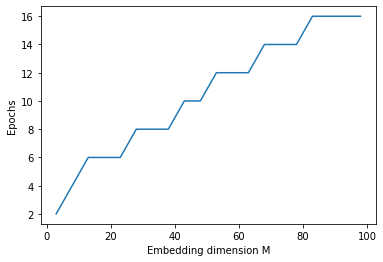

In [24]:
plt.plot(Ms,Nepoch)
plt.xlabel('Embedding dimension M')
plt.ylabel('Epochs')
plt.savefig('figurescaling.eps', dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='eps',
        transparent=False, bbox_inches=None, pad_inches=0.1)

In [20]:
print(Nepoch)

[2, 4, 6, 6, 6, 8, 8, 8, 10, 10, 12, 12, 12, 14, 14, 14, 16, 16, 16, 16]


In [21]:
print(out)

{'accuracy': 0.0001, 'epoch': 16, 'ntrain': 300, 'nvalid': 50, 'N': 3, 'M': 98, 'X': array([[0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j]], dtype=complex64)}


In [22]:
print(Ms)

[3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88, 93, 98]


In [23]:
print(Nepoch)

[2, 4, 6, 6, 6, 8, 8, 8, 10, 10, 12, 12, 12, 14, 14, 14, 16, 16, 16, 16]
